In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

In [63]:
search_results_1 = pd.read_csv('./SANDBOX_as_csv.csv')
search_results_2 = pd.read_csv('./beta_mach_unsup_alpha_prof.csv')

In [79]:
search_results_2.sort_values(by='loss', ascending=True)[['config.alpha_prof', 'config.beta_mach_unsup', 'loss', 'loss_mp', 'KLD_stoch']].head(20)

,config.alpha_prof,config.beta_mach_unsup,loss,loss_mp,KLD_stoch
462,960,0.0751,0.143671,0.704065,6.758330
60,517,0.0058,0.149672,0.717091,3.571534
71,454,0.0260,0.151470,0.708440,3.117147
186,607,0.0455,0.152869,0.701261,1.294631
75,860,0.0694,0.153745,0.707140,5.729671
116,295,0.0005,0.154563,0.700762,2.608026
298,314,0.0110,0.154648,0.695982,1.766161
206,391,0.0180,0.155905,0.694143,2.839878
459,460,0.0007,0.156114,0.693865,2.884100
405,609,0.0168,0.156353,0.701260,4.827364


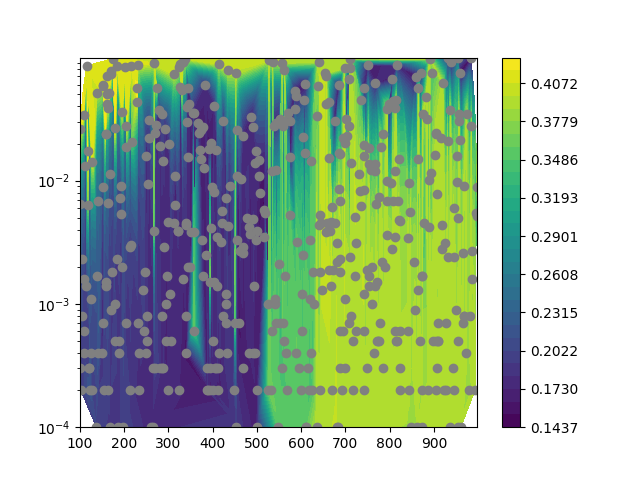

In [72]:
fig = plt.figure()
ax = fig.add_subplot()
levels_loss = np.linspace(search_results_2['loss'].min(), search_results_2['loss'].max(), 30)
recon_ax = ax.tricontourf(search_results_2['config.alpha_prof'], search_results_2['config.beta_mach_unsup'], search_results_2['loss'], levels=levels_loss)
ax.scatter(search_results_2['config.alpha_prof'], search_results_2['config.beta_mach_unsup'], c='grey')
ax.set_yscale('log')
fig.colorbar(recon_ax, ax=ax)
plt.show()

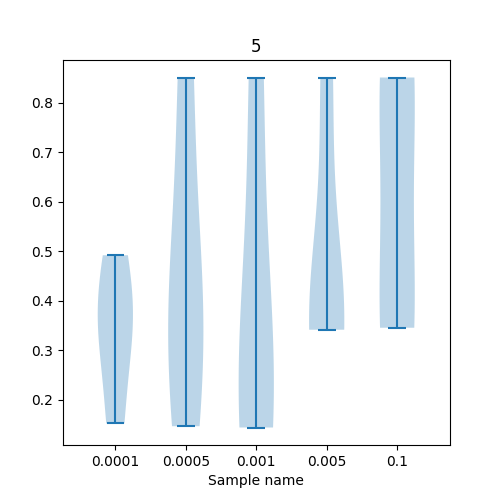

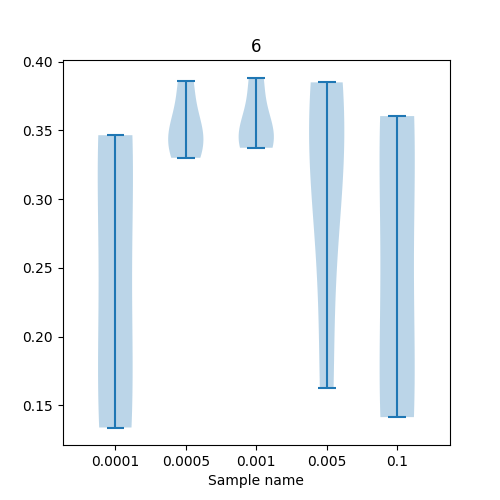

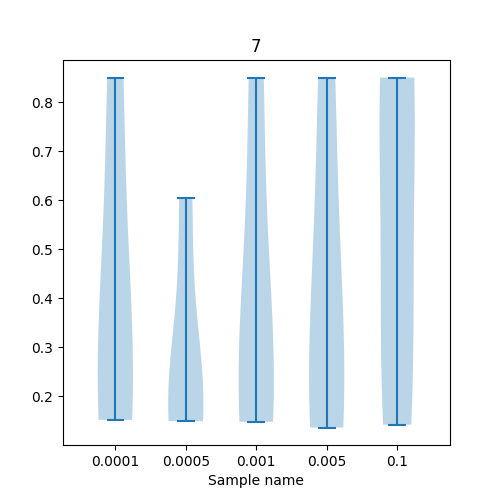

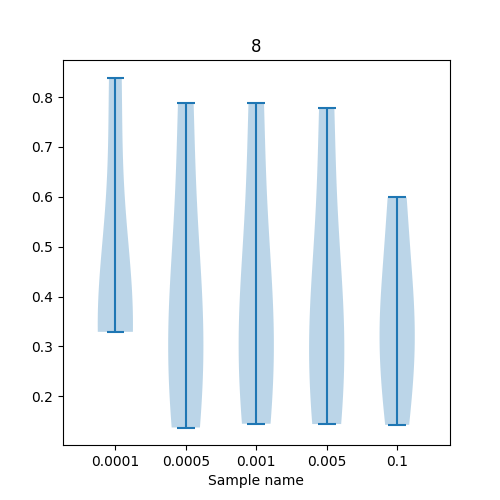

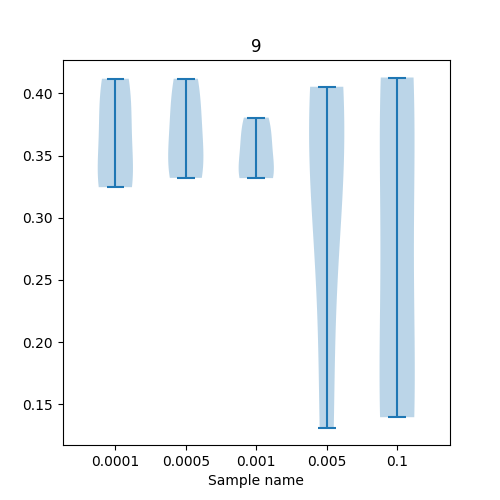

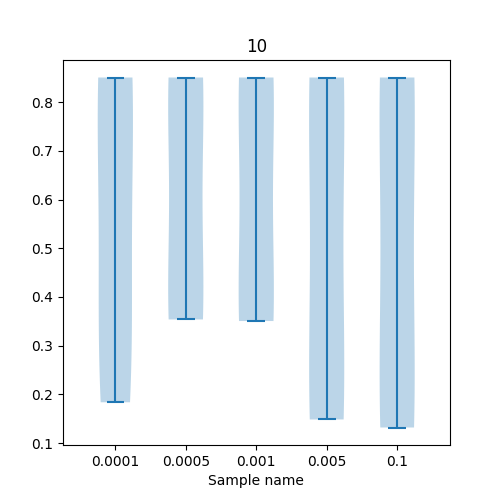

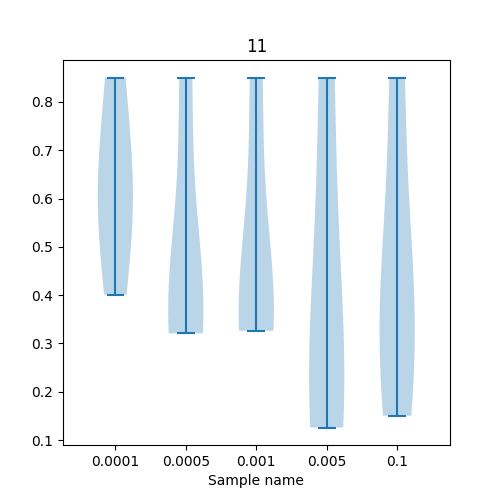

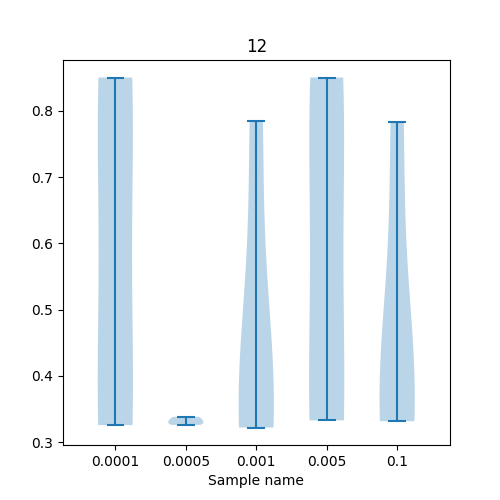

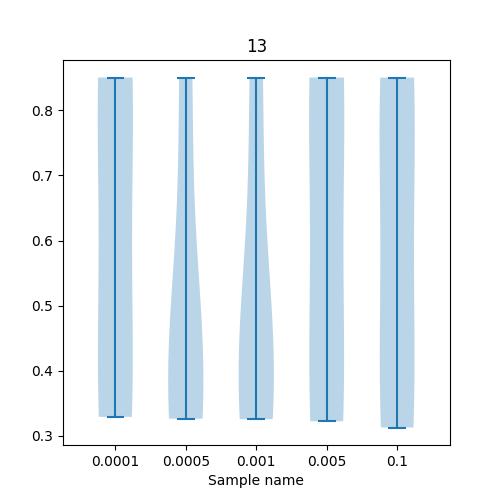

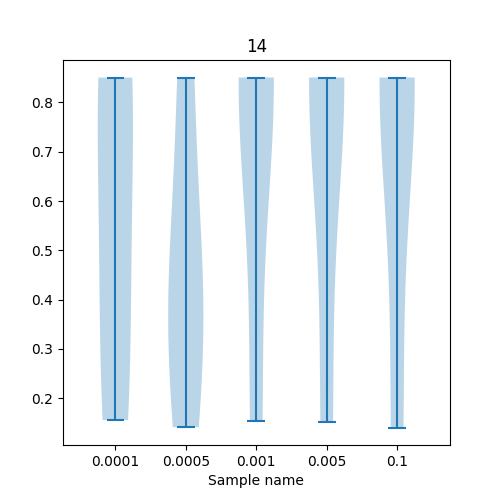

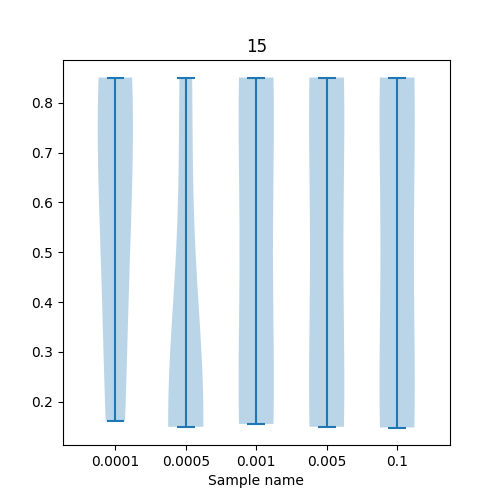

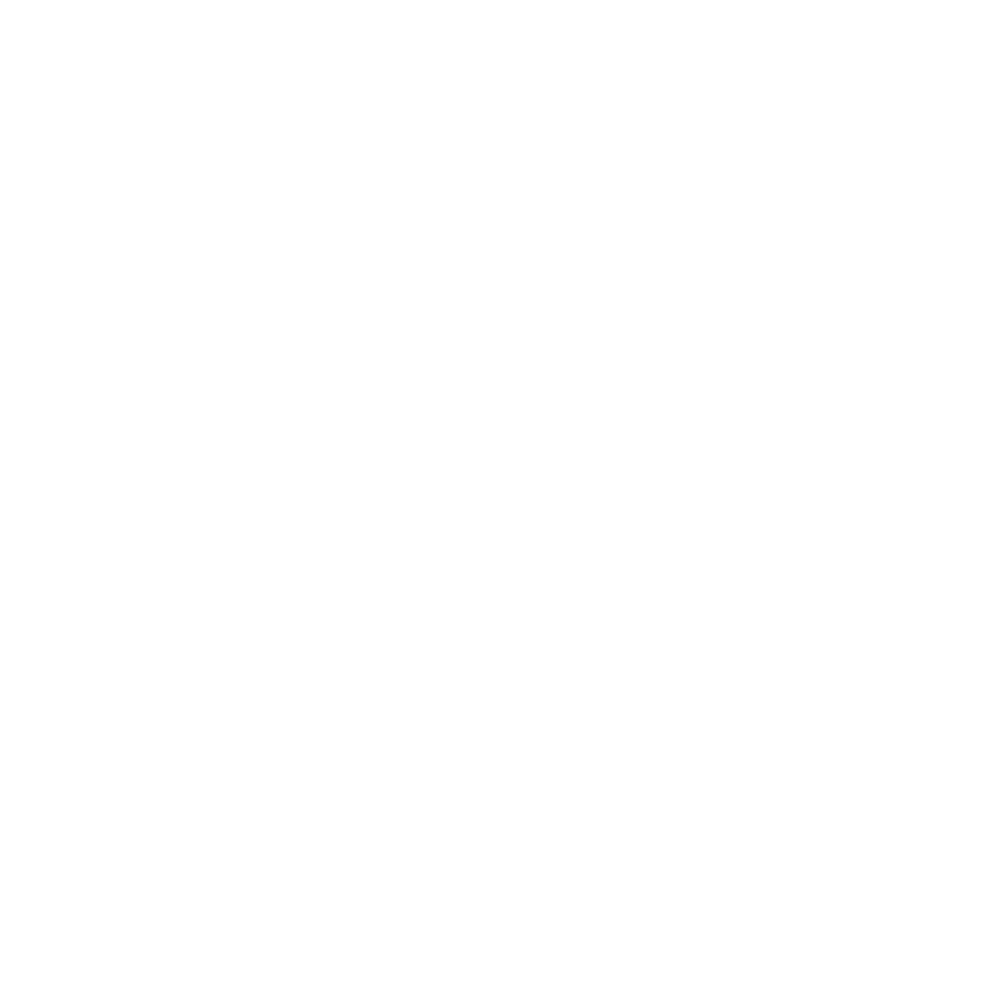

In [62]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')

plt.close('all')
fig = plt.figure(figsize=(10, 10))
subgroups = search_results_1.groupby('   mach_latent_dim ')
for name, subgroup in subgroups: 
    groups = subgroup.groupby('   beta_mach_unsup ')
    violin_plots = []
    labels = []
    for stoch, group in groups: 
        violin_plots.append(group['     loss '].to_list())
        labels.append(str(stoch))
        
    
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot()
    ax.violinplot(violin_plots)
    ax.set_title(name)
    set_axis_style(ax, labels)
    plt.show()

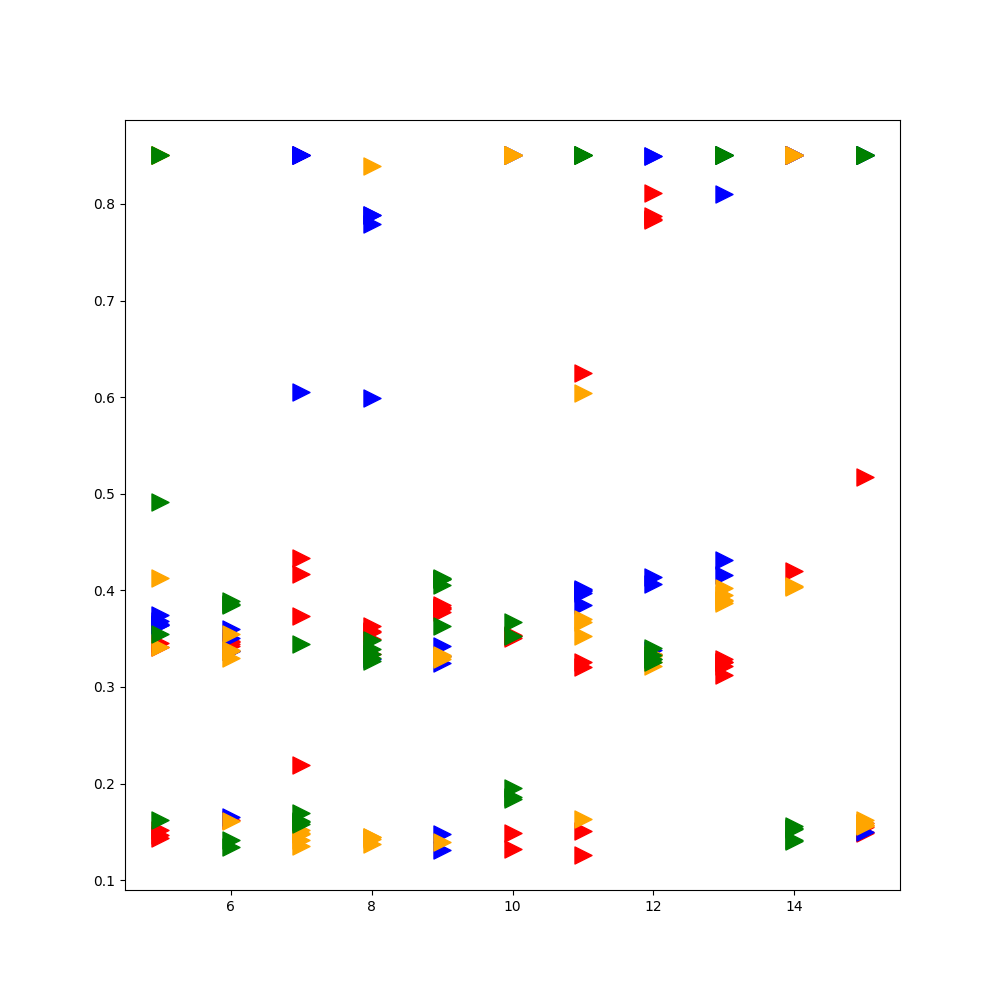

In [43]:
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

markers = {'0.1': "1", '0.001': "^",'0.0001': ">",'0.005': "2",'0.0005': "3",}
colors = {'3': 'red', '4': 'blue', '5': 'orange', '6': 'green'}
groups = search_results_1.groupby('   stoch_latent_dim ')
for stoch, group in groups: 
    subgroups = group.groupby('   beta_mach_unsup ')
    for beta, subgroup in subgroups: 
        ax.scatter(group['   mach_latent_dim '], group['     loss '], s=150, color=colors[str(stoch)], marker=markers[str(beta)])
        break
plt.show()

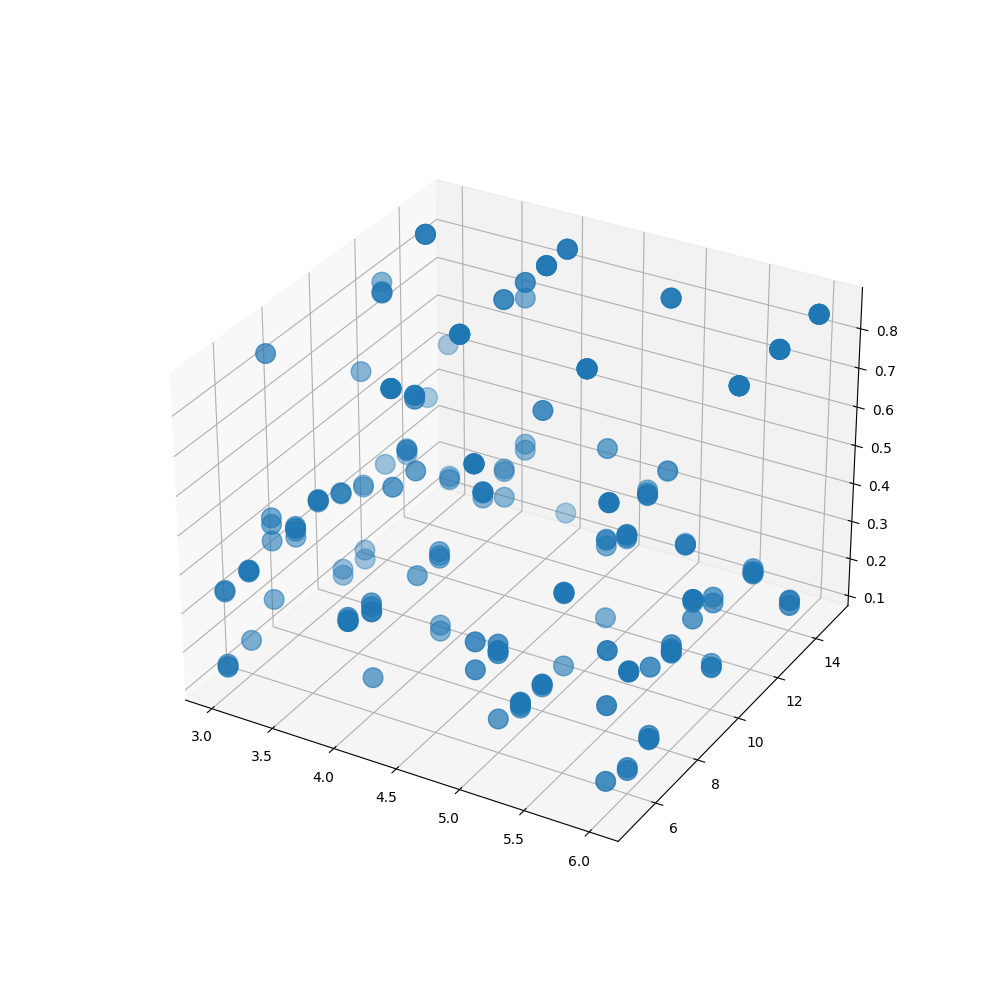

In [20]:
plt.close('all')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(search_results_1['   stoch_latent_dim '], search_results_1['   mach_latent_dim '], search_results_1['     loss '], s=200)
plt.show()